In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import scipy.stats as stat
import pylab 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score

In [2]:
pd.set_option('display.max_columns', None)

df = pd.read_csv("C:/Project/Electricity_project/RawData/GlobalEYUtility_Final_for Demo.csv")
df.head()

,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_Times_Exceeded100_,No_of_times_exceeded_60_,No_of_time_below_60_,No_of_Times_Exceeded90_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Peak_Slab,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,IR_Value_After_JointingPHASE_TO,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon,New_Winter,_dataobs_,Feeder,Switch,Section Id,Pathid,Path Order,Lat,Long,Customer At Risk,Revenue At Rsik,Assets At Risk,Risk Type,NoFaultsSince2016
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,0.0,96.0,0.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.55125,1.565161,43.99,M,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,250.0,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.5,9.08,0.0,0.0,M,M,N,N,N,Y,379.0,30462.0,10499.0,30462-10499-1,SANTACRUZ RECEIVING STATION-ANAND NAGAR NO.2 S...,2.0,19.080542,72.845893,8000.0,97.0,10.0,Low,0.0
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,0.0,96.0,0.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.10000,0.100000,19.24,M,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,350.0,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.1,18.46,0.0,0.0,M,M,N,N,N,Y,705.0,30462.0,10499.0

In [3]:
df = df[:300]
df.shape

(300, 119)

In [4]:
df.head()

,abin,Feeder_Category,BREAKER_MAKE,UpcaseRoadTraffic,Upcase_DepthOfCable,Upcase_SoilCondition,Upcase_LeadExposed,Upcase_ArmourCableCondition,CABLE_SIZE,NO__OF_PARALLEL_RUNNING_CABLES,FaultCurrent_Count,_5Yr_Faults_Count,No_of_Load_transfer_Operations,No_of_Times_Exceeded100_,No_of_times_exceeded_60_,No_of_time_below_60_,No_of_Times_Exceeded90_,LENGTH_OF_CABLE_MTRS_,NO__OF_JOINTS,AGE_YRS_,Number_OF_Cables,PILC,XLPE,DATE_ONLY,DAY_OF_WEEK,WEEKEND_Y_N_,Average_Current,MORNING_AVG_CURRENT,AFTERNOON_AVG_CURRENT,EVENING_AVG_CURRENT,Peak_Current,Peak_Slab,Average_voltage,MORNING_AVG_VOLTAGE,AFTERNOON_AVG_VOLTAGE,EVENING_AVG_VOLTAGE,Peak_Voltage,target,Avg_Heat_Index,Morning_AVG_Heat_Index,Afternoon_AVG_Heat_Index,Evening_Avg_Heat_Index,Peak_HI,Avg_humidity,Morning_AVG_humidity,Afternoon_AVG_HUMIDITY,Evening_Avg_HUMIDITY,Max_Humidity,Avg_TEMP,Morning_AVG_TEMP,Afternoon_AVG_TEMP,Evening_Avg_TEMP,Max_TEMP,IR_Value_After_JointingPHASE_TO,MORNING_AVG_CURRENT_N_1,MORNING_AVG_CURRENT_N_2,AFTERNOON_AVG_CURRENT_N_1,AFTERNOON_AVG_CURRENT_N_2,EVENING_AVG_CURRENT_N_1,EVENING_AVG_CURRENT_N_2,MORNING_AVG_VOLTAGE_N_1,MORNING_AVG_VOLTAGE_N_2,AFTERNOON_AVG_VOLTAGE_N_1,AFTERNOON_AVG_VOLTAGE_N_2,EVENING_AVG_VOLTAGE_N_1,EVENING_AVG_VOLTAGE_N_2,TARGET_N_1,TARGET_N_2,AVERAGE_CURRENT_N_1,AVERAGE_CURRENT_N_2,AVERAGE_VOLTAGE_N_1,AVERAGE_VOLTAGE_N_2,AVERAGE_HEAT_INDEX_N_1,AVERAGE_HEAT_INDEX_N_2,AVERAGE_HUMUDITY_N_1,AVERAGE_HUMUDITY_N_2,AVERAGE_TEMP_N_1,AVERAGE_TEMP_N_2,MORNING_AVG_HEAT_INDEX_N_1,MORNING_AVG_HEAT_INDEX_N_2,AFTERNOON_AVG_HEAT_INDEX_N_1,AFTERNOON_AVG_HEAT_INDEX_N_2,EVENING_AVG_HEAT_INDEX_N_1,EVENING_AVG_HEAT_INDEX_N_2,MORNING_AVG_HUMUDITY_N_1,MORNING_AVG_HUMUDITY_N_2,AFTERNOON_AVG_HUMUDITY_N_1,AFTERNOON_AVG_HUMUDITY_N_2,EVENING_AVG_HUMUDITY_N_1,EVENING_AVG_HUMUDITY_N_2,MORNING_AVG_TEMP_N_1,MORNING_AVG_TEMP_N_2,AFTERNOON_AVG_TEMP_N_1,AFTERNOON_AVG_TEMP_N_2,EVENING_AVG_TEMP_N_1,EVENING_AVG_TEMP_N_2,Peak_Current_N_1,Peak_Current_N_2,Peak_Current_Time_N_1,Peak_Current_Time_N_2,Peak_Current_Slab_N_1,Peak_Current_Slab_N_2,New_PublicHoliday,New_Summer,New_Monsoon,New_Winter,_dataobs_,Feeder,Switch,Section Id,Pathid,Path Order,Lat,Long,Customer At Risk,Revenue At Rsik,Assets At Risk,Risk Type,NoFaultsSince2016
0,ED,RES,SIEMENS VCB,MODERATE,NORMAL,DRY,NO,STRONG,120.0,3.0,2.0,5.0,0.0,0.0,0.0,96.0,0.0,586.6,7.0,36.0,2.0,1.0,1.0,08-01-2016,6.0,N,4.352917,9.688485,1.55125,1.565161,43.99,M,11.047187,11.035455,11.026250,11.081290,11.20,1.0,26.667515,23.993545,28.256467,27.873791,31.224829,60.078646,70.946061,48.330312,60.637419,79.34,25.887917,22.996970,27.952188,26.834516,31.11,250.0,68.730303,19.471818,108.005000,20.005000,107.405161,21.148710,11.035455,10.961818,11.026250,11.001875,11.081290,10.954839,0.0,0.0,94.310625,20.191042,11.047187,10.972917,26.667515,26.667515,60.078646,60.078646,25.887917,25.887917,23.993545,23.993545,28.256467,28.256467,27.873791,27.873791,70.946061,70.946061,48.330312,48.330312,60.637419,60.637419,22.996970,22.996970,27.952188,27.952188,26.834516,26.834516,1.5,9.08,0.0,0.0,M,M,N,N,N,Y,379.0,30462.0,10499.0,30462-10499-1,SANTACRUZ RECEIVING STATION-ANAND NAGAR NO.2 S...,2.0,19.080542,72.845893,8000.0,97.0,10.0,Low,0.0
1,ED,RES,ABB SF6,HEAVY,NORMAL,MOIST,NO,STRONG,300.0,1.0,7.0,2.0,0.0,0.0,0.0,96.0,0.0,533.1,5.0,NaN,1.0,0.0,1.0,15-01-2016,6.0,N,4.416875,12.658182,0.10000,0.100000,19.24,M,11.021667,10.977576,11.050000,11.039355,11.27,1.0,24.975674,22.618742,26.488964,25.922561,28.202562,69.590937,74.704545,63.073125,70.875484,76.92,23.927083,21.308182,25.579687,25.009032,27.30,350.0,58.424242,34.783333,79.528125,53.851250,88.881613,52.395484,10.977576,10.977576,11.050000,11.050000,11.039355,11.039355,0.0,0.0,75.294062,46.826563,11.021667,11.021667,24.975674,24.975674,69.590937,69.590937,23.927083,23.927083,22.618742,22.618742,26.488964,26.488964,25.922561,25.922561,74.704545,74.704545,63.073125,63.073125,70.875484,70.875484,21.308182,21.308182,25.579687,25.579687,25.009032,25.009032,0.1,18.46,0.0,0.0,M,M,N,N,N,Y,705.0,30462.0,10499.0

In [5]:
def plot_data(df,feature):
    plt.figure(figsize=(10,6))
    plt.subplot(1,2,1)
    df[feature].hist()
    plt.subplot(1,2,2)
    stat.probplot(df[feature],dist='norm',plot=pylab)
    plt.show()

Feature : CABLE_SIZE


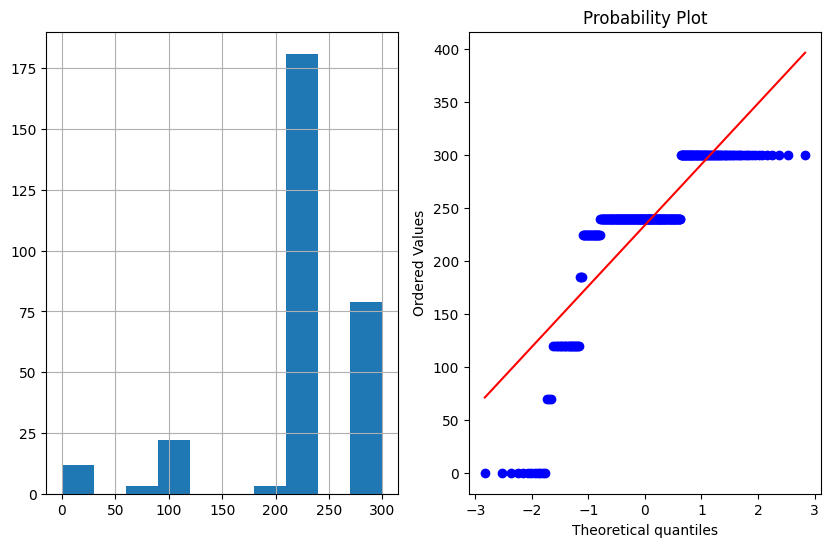

Feature : LENGTH_OF_CABLE_MTRS_


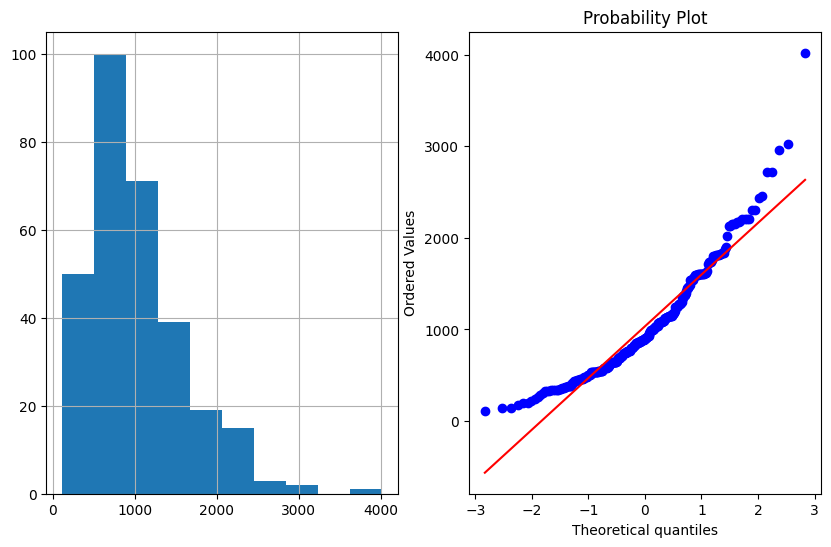

Feature : AGE_YRS_


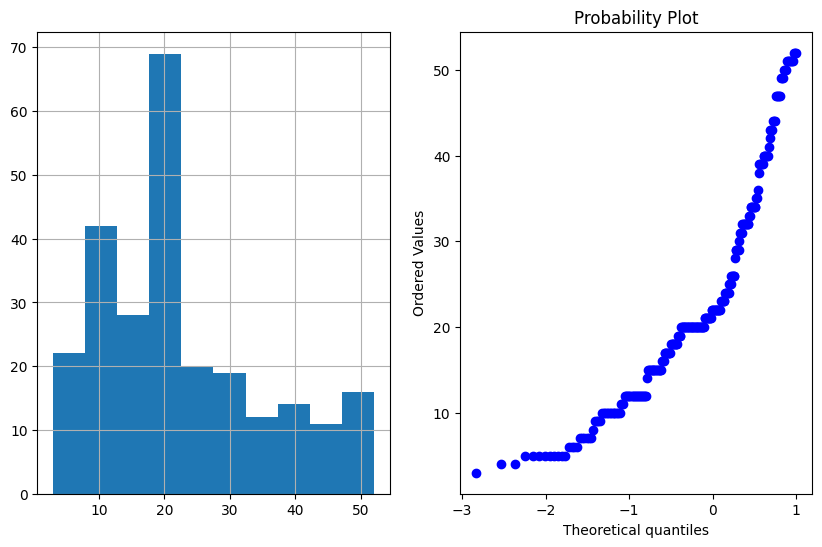

Feature : Average_Current


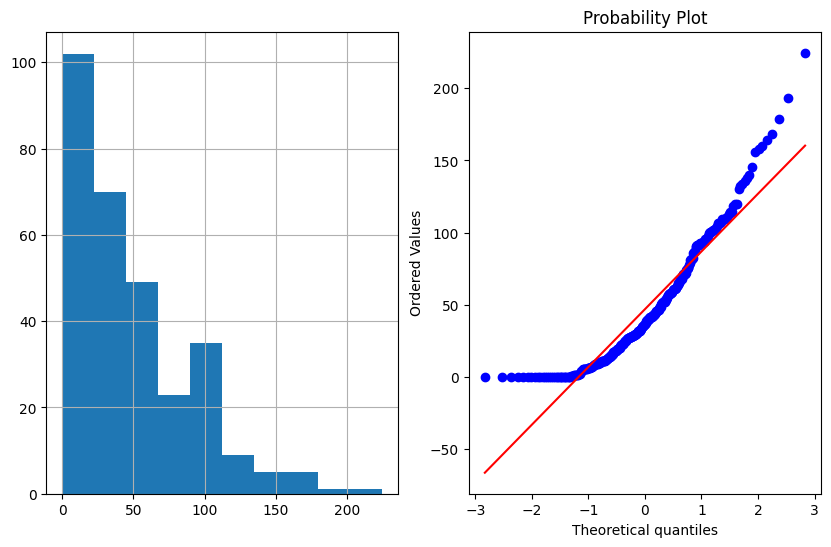

Feature : Average_voltage


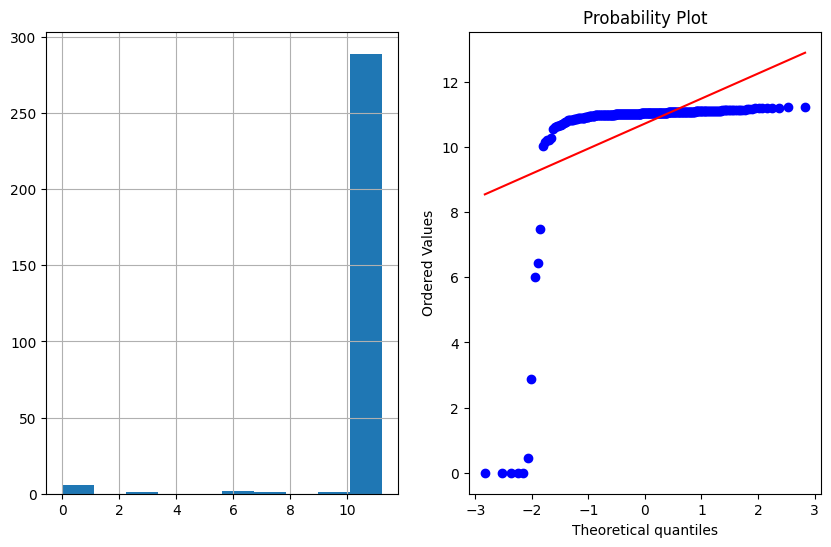

Feature : Avg_Heat_Index


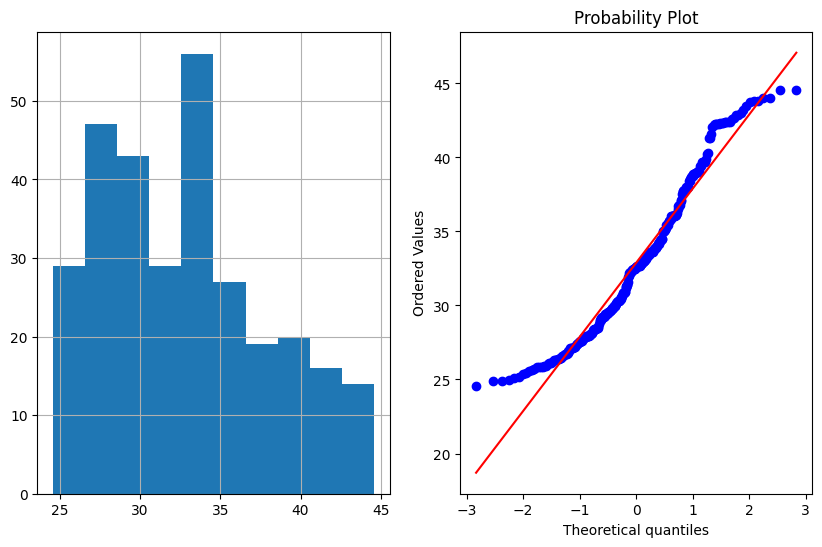

Feature : Avg_humidity


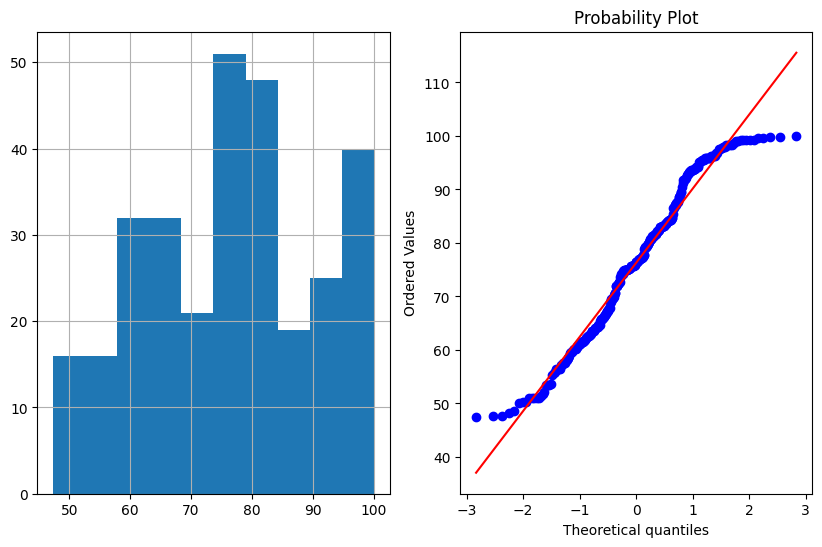

Feature : Avg_TEMP


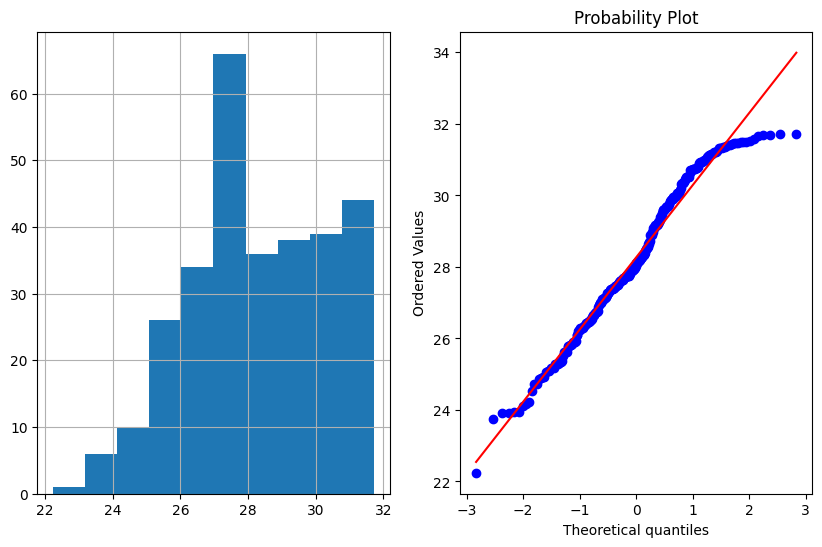

In [6]:
for i in ['CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_','Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP']:
    print(f"Feature : {i}")
    plot_data(df,i)

In [10]:
## CABLE_SIZE-> categorical
## Average_voltage -> 8-10 is optimal -> need transformation
## AGE_YRS -> need transformation

In [11]:
def dataset_divide(df):
    X_p = df.drop(columns=['target'])
    y_p = df['target']
    ## splitting in train test val set
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=1)
    print(f"X_train : {X_train.shape}")
    print(f"X_test : {X_test.shape}")
    print(f"y_train : {y_train.shape}")
    print(f"y_test : {y_test.shape}")
    return X_train, X_test, y_train, y_test

def get_training(X_train, X_test, y_train, y_test):
    algos = [LogisticRegression(),
             DecisionTreeClassifier(), 
             RandomForestClassifier(),
             XGBClassifier(),
             GradientBoostingClassifier()]

    names = ["Logistic Regression",
             "DecisionTree Classifier",
             "RandomForest Classifier",
             "XGBClassifier",
             "GradientBoostingClassifier"]

    acc = []
    pre = []
    rec = []
    f1 = []
    r_a = []
    
    for name in algos:
        model = name
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test)
        accu = accuracy_score(y_test,y_pred)
        prec = precision_score(y_test,y_pred)
        reca = recall_score(y_test,y_pred)
        f1_sc = f1_score(y_test,y_pred)
        roc_auc = roc_auc_score(y_test,y_pred)
        
        acc.append(accu) 
        pre.append(prec)
        rec.append(rec)
        f1.append(f1_score)
        r_a.append(roc_auc)
    
    a={'Name':names,
       'Accuracy_Score':acc, 
       'Precision' : pre,
       'Recall' : reca,
       'F_1 Score ': f1_sc,
       'ROC_AUC' : r_a}
    evaluation = pd.DataFrame(a)
    print(evaluation)
    

def get_prediction(X_train, X_test, y_train, y_test):
    ## Prediction on test set
    model = XGBClassifier(n_estimators=100, max_depth=2 ,eta=0.1)
    model.fit(X_train,y_train)
    print(f"Score on training {model.score(X_train,y_train)}")
    class_pred = model.predict(X_test)
    class_prob_test = model.predict_proba(X_test)
    print(class_prob_test[0])
    print(class_pred[0])

    ab = []
    for i in class_prob_test[:,0]:
        if i <= 0.5:
            ab.append("Low")
        elif i>0.5 and i<=0.75:
            ab.append("Need Further Evaluation")
        else:
            ab.append("High")   

    print(pd.DataFrame(list(zip(class_prob_test[:,0],ab)),columns =['Prob', 'class']))

### Feeder_Category vs target

In [12]:
df['Feeder_Category'] = df['Feeder_Category'].map({
                                                    'RES':0,
                                                    'COM':1,
                                                    'MIX':2})

df['Feeder_Category'].fillna(0,inplace=True)

In [13]:
df1 = df[['Feeder_Category','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision  Recall  F_1 Score    
0         Logistic Regression        0.616667   0.616667     1.0    0.762887  \
1     DecisionTree Classifier        0.616667   0.616667     1.0    0.762887   
2     RandomForest Classifier        0.616667   0.616667     1.0    0.762887   
3               XGBClassifier        0.616667   0.616667     1.0    0.762887   
4  GradientBoostingClassifier        0.616667   0.616667     1.0    0.762887   

   ROC_AUC  
0      0.5  
1      0.5  
2      0.5  
3      0.5  
4      0.5  
None
Score on training 0.5708333333333333
[0.42916894 0.57083106]
1
        Prob class
0   0.429169   Low
1   0.429169   Low
2   0.429169   Low
3   0.429169   Low
4   0.429169   Low
5   0.429169   Low
6   0.429169   Low
7   0.429169   Low
8   0.429169   Low
9   0.429169   Low
10  0.429169   Low
11  0.429169   Low
12  0.429169   Low
13  0.429169   Low
14  0.429169   Low
1

In [11]:
#### Feeder_Category only contributing 49-60% un the predictive model

### UpcaseRoadTraffic vs target

In [14]:
df['UpcaseRoadTraffic'] = df['UpcaseRoadTraffic'].map({
    'HEAVY':0,
    'MODERATE':1,
    'LOW':2
})

df['UpcaseRoadTraffic'].fillna(0,inplace=True)

In [15]:
df1 = df[['UpcaseRoadTraffic','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.600000   0.610169  0.783784  \
1     DecisionTree Classifier        0.566667   0.617021  0.783784   
2     RandomForest Classifier        0.566667   0.617021  0.783784   
3               XGBClassifier        0.566667   0.617021  0.783784   
4  GradientBoostingClassifier        0.566667   0.617021  0.783784   

   F_1 Score    ROC_AUC  
0    0.690476  0.486486  
1    0.690476  0.500588  
2    0.690476  0.500588  
3    0.690476  0.500588  
4    0.690476  0.500588  
None
Score on training 0.6041666666666666
[0.3932771 0.6067229]
1
        Prob                    class
0   0.393277                      Low
1   0.393277                      Low
2   0.393277                      Low
3   0.393277                      Low
4   0.574021  Need Further Evaluation
5   0.393277                      Low
6   0.393277           

### Upcase_SoilCondition vs target

In [16]:
df['Upcase_SoilCondition'] = df['Upcase_SoilCondition'].map({
    'DRY':0,
    'MOIST':1,
    'WET':2,
    'ROCKY':3})

df['UpcaseRoadTraffic'].fillna(0,inplace=True)

In [17]:
df1 = df[['Upcase_SoilCondition','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision  Recall  F_1 Score    
0         Logistic Regression        0.616667   0.616667     1.0    0.762887  \
1     DecisionTree Classifier        0.616667   0.616667     1.0    0.762887   
2     RandomForest Classifier        0.616667   0.616667     1.0    0.762887   
3               XGBClassifier        0.616667   0.616667     1.0    0.762887   
4  GradientBoostingClassifier        0.616667   0.616667     1.0    0.762887   

   ROC_AUC  
0      0.5  
1      0.5  
2      0.5  
3      0.5  
4      0.5  
None
Score on training 0.5708333333333333
[0.48342645 0.51657355]
1
        Prob class
0   0.483426   Low
1   0.348507   Low
2   0.348507   Low
3   0.483426   Low
4   0.348507   Low
5   0.348507   Low
6   0.483426   Low
7   0.483426   Low
8   0.483426   Low
9   0.348507   Low
10  0.483426   Low
11  0.348507   Low
12  0.483426   Low
13  0.483426   Low
14  0.483426   Low
1

### Upcase_ArmourCableCondition vs target

In [18]:
df['Upcase_ArmourCableCondition'] = df['Upcase_ArmourCableCondition'].map({
    'STRONG':0,
    'CORRODED':1,
    'EXPOSED':2})

df['Upcase_ArmourCableCondition'].fillna(0,inplace=True)

In [19]:
df1 = df[['Upcase_ArmourCableCondition','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.466667   0.619048  0.351351  \
1     DecisionTree Classifier        0.466667   0.619048  0.351351   
2     RandomForest Classifier        0.616667   0.616667  0.351351   
3               XGBClassifier        0.466667   0.619048  0.351351   
4  GradientBoostingClassifier        0.466667   0.619048  0.351351   

   F_1 Score    ROC_AUC  
0    0.448276  0.501763  
1    0.448276  0.501763  
2    0.448276  0.500000  
3    0.448276  0.501763  
4    0.448276  0.501763  
None
Score on training 0.575
[0.352983 0.647017]
1
        Prob                    class
0   0.352983                      Low
1   0.503524  Need Further Evaluation
2   0.352983                      Low
3   0.352983                      Low
4   0.503524  Need Further Evaluation
5   0.503524  Need Further Evaluation
6   0.143222                      Low


### CABLE_SIZE vs target

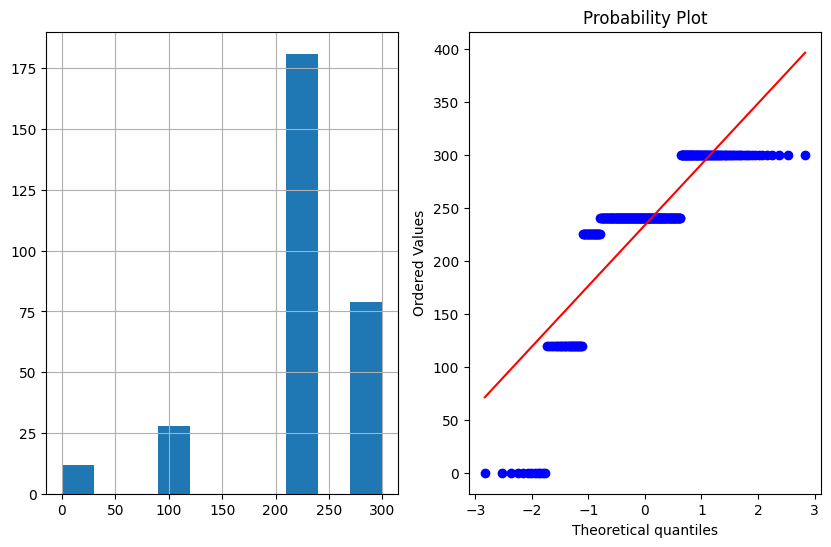

In [20]:
df['CABLE_SIZE'] = df['CABLE_SIZE'].map({
    240.00 : 0,
    300.00 : 1,
    225.00 : 1,
    120.00: 2,
    185.00 : 2,
    70.00 : 2,
    0.15 : 3,
    0.20: 3,
    0.30 : 3
})

df['CABLE_SIZE'].fillna(240.00,inplace=True)

plot_data(df,'CABLE_SIZE')

In [21]:
df1 = df[['CABLE_SIZE','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision   Recall  F_1 Score    
0         Logistic Regression        0.616667   0.616667  0.72973    0.692308  \
1     DecisionTree Classifier        0.600000   0.658537  0.72973    0.692308   
2     RandomForest Classifier        0.600000   0.658537  0.72973    0.692308   
3               XGBClassifier        0.600000   0.658537  0.72973    0.692308   
4  GradientBoostingClassifier        0.600000   0.658537  0.72973    0.692308   

    ROC_AUC  
0  0.500000  
1  0.560517  
2  0.560517  
3  0.560517  
4  0.560517  
None
Score on training 0.5958333333333333
[0.6659846  0.33401543]
0
        Prob                    class
0   0.665985  Need Further Evaluation
1   0.523614  Need Further Evaluation
2   0.385867                      Low
3   0.665985  Need Further Evaluation
4   0.385867                      Low
5   0.523614  Need Further Evaluation
6   0.385867               

### LENGTH_OF_CABLE_MTRS_ vs target

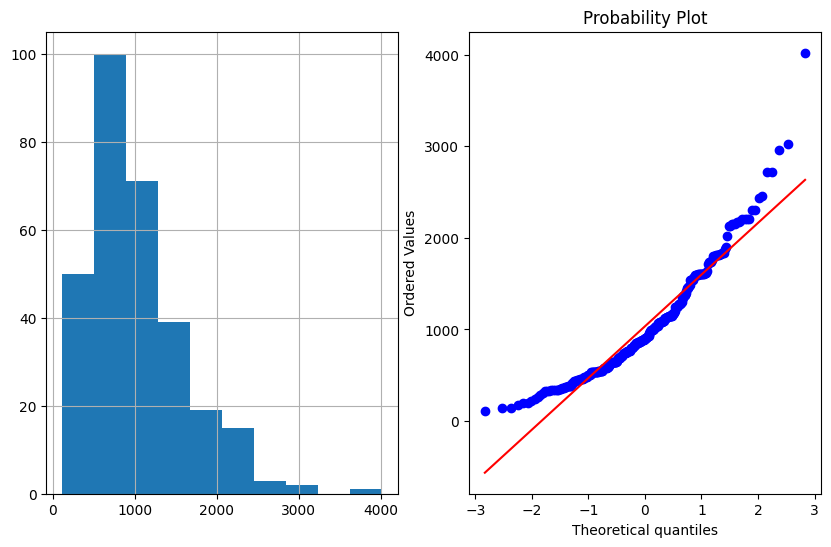

In [22]:
df['LENGTH_OF_CABLE_MTRS_'].fillna(df['LENGTH_OF_CABLE_MTRS_'].mean(),inplace=True)

plot_data(df,'LENGTH_OF_CABLE_MTRS_')

In [23]:
df1 = df[['LENGTH_OF_CABLE_MTRS_','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.616667   0.616667  0.486486  \
1     DecisionTree Classifier        0.466667   0.600000  0.486486   
2     RandomForest Classifier        0.500000   0.629630  0.486486   
3               XGBClassifier        0.533333   0.645161  0.486486   
4  GradientBoostingClassifier        0.483333   0.600000  0.486486   

   F_1 Score    ROC_AUC  
0    0.537313  0.500000  
1    0.537313  0.485311  
2    0.537313  0.512338  
3    0.537313  0.531140  
4    0.537313  0.482374  
None
Score on training 0.7208333333333333
[0.47221404 0.52778596]
1
        Prob                    class
0   0.472214                      Low
1   0.557098  Need Further Evaluation
2   0.660352  Need Further Evaluation
3   0.472214                      Low
4   0.220120                      Low
5   0.875480                     High
6   0.183176         

### AGE_YRS_ vs target

47


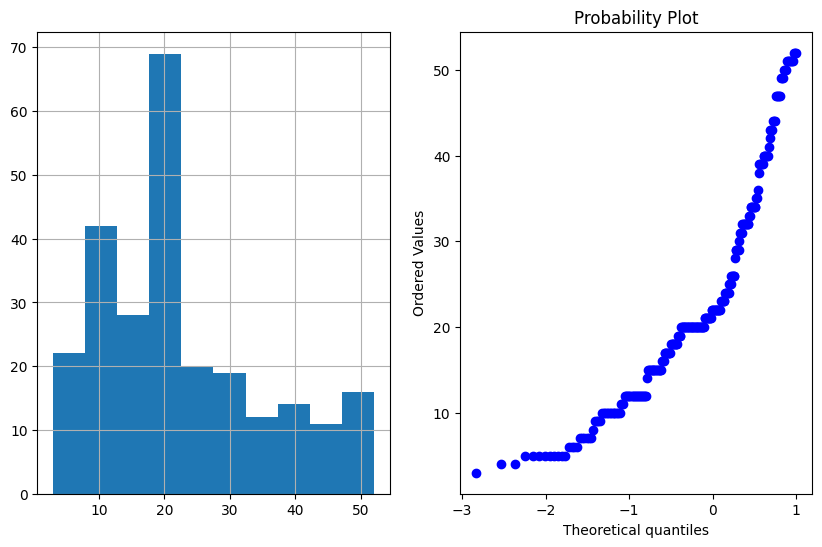

In [24]:
print(df['AGE_YRS_'].isna().sum())
plot_data(df,'AGE_YRS_')

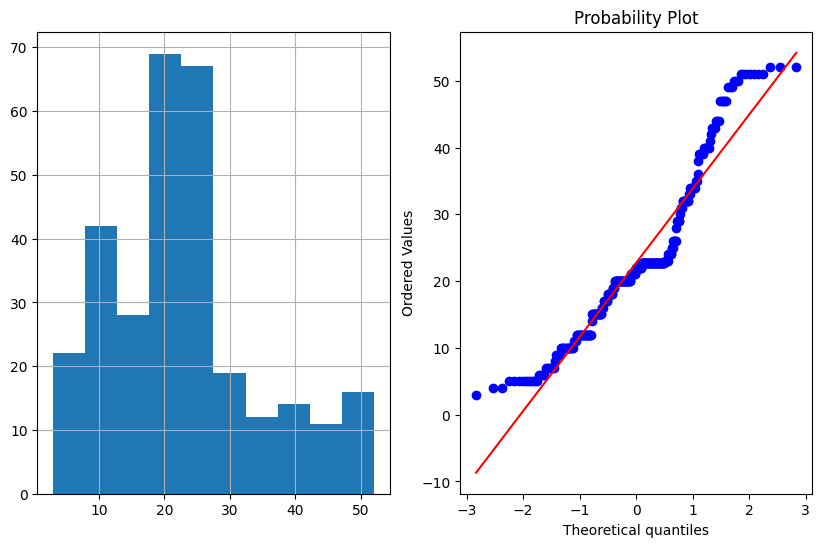

In [25]:
df['AGE_YRS_'] = df['AGE_YRS_'].fillna(df['AGE_YRS_'].mean())
plot_data(df,'AGE_YRS_')

In [26]:
df1 = df[['AGE_YRS_','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.600000   0.618182  0.783784  \
1     DecisionTree Classifier        0.750000   0.843750  0.783784   
2     RandomForest Classifier        0.733333   0.769231  0.783784   
3               XGBClassifier        0.716667   0.763158  0.783784   
4  GradientBoostingClassifier        0.716667   0.763158  0.783784   

   F_1 Score    ROC_AUC  
0    0.773333  0.502938  
1    0.773333  0.756169  
2    0.773333  0.709753  
3    0.773333  0.696240  
4    0.773333  0.696240  
None
Score on training 0.6375
[0.324189 0.675811]
1
        Prob                    class
0   0.324189                      Low
1   0.324189                      Low
2   0.324189                      Low
3   0.324189                      Low
4   0.496459                      Low
5   0.543512  Need Further Evaluation
6   0.359006                      Low

### Average_Current vs target

0


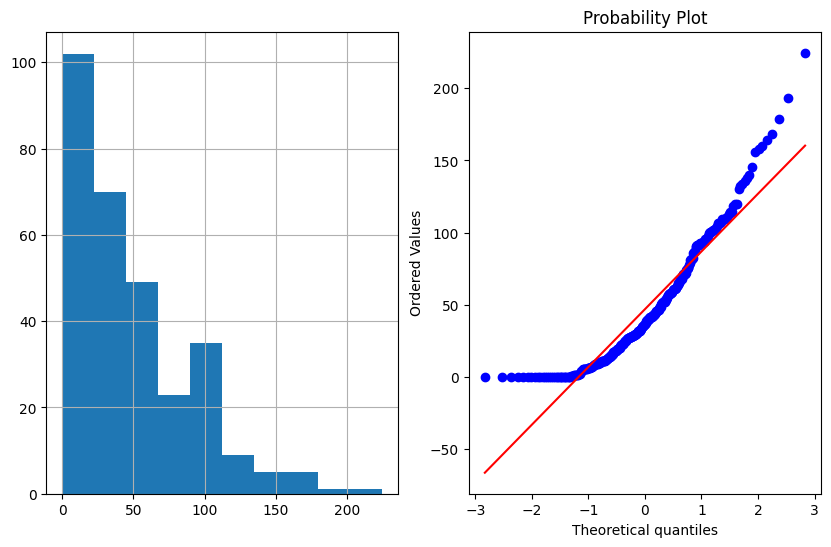

In [27]:
print(df['Average_Current'].isna().sum())
plot_data(df,'Average_Current')

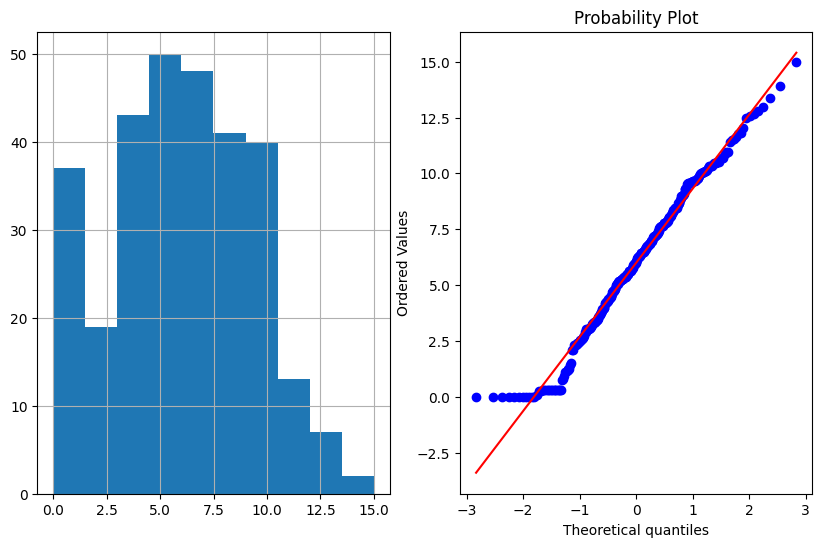

In [28]:
##### Square Root Transformation
df['Average_Current']=df.Average_Current**(1/2)
plot_data(df,'Average_Current')

In [29]:
df1 = df[['Average_Current','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.633333   0.627119  0.864865  \
1     DecisionTree Classifier        0.700000   0.771429  0.864865   
2     RandomForest Classifier        0.700000   0.771429  0.864865   
3               XGBClassifier        0.716667   0.763158  0.864865   
4  GradientBoostingClassifier        0.733333   0.744186  0.864865   

   F_1 Score    ROC_AUC  
0         0.8  0.521739  
1         0.8  0.690952  
2         0.8  0.690952  
3         0.8  0.696240  
4         0.8  0.693302  
None
Score on training 0.7833333333333333
[0.35781837 0.64218163]
1
        Prob                    class
0   0.357818                      Low
1   0.635109  Need Further Evaluation
2   0.076029                      Low
3   0.357818                      Low
4   0.410619                      Low
5   0.791354                     High
6   0.145516         

### Average_voltage vs target

0


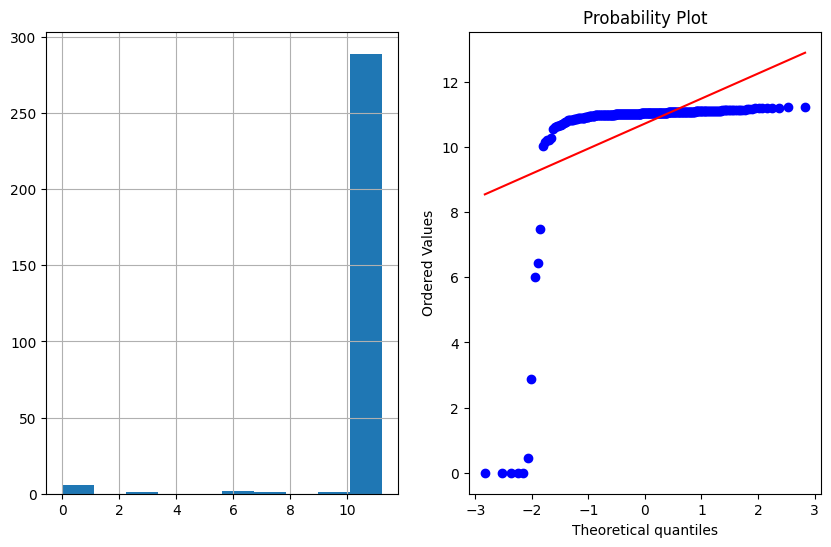

In [30]:
print(df['Average_voltage'].isna().sum())
plot_data(df,'Average_voltage')

In [31]:
## Voltage ranges between 10-12

df1 = df[['Average_voltage','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.616667   0.616667  0.567568  \
1     DecisionTree Classifier        0.483333   0.593750  0.567568   
2     RandomForest Classifier        0.466667   0.575758  0.567568   
3               XGBClassifier        0.516667   0.605263  0.567568   
4  GradientBoostingClassifier        0.500000   0.600000  0.567568   

   F_1 Score    ROC_AUC  
0    0.583333  0.500000  
1    0.583333  0.474148  
2    0.583333  0.452409  
3    0.583333  0.484724  
4    0.583333  0.479436  
None
Score on training 0.7458333333333333
[0.39752376 0.60247624]
1
        Prob                    class
0   0.397524                      Low
1   0.486594                      Low
2   0.307807                      Low
3   0.397524                      Low
4   0.186431                      Low
5   0.513231  Need Further Evaluation
6   0.280431         

### Avg_Heat_Index vs target

0


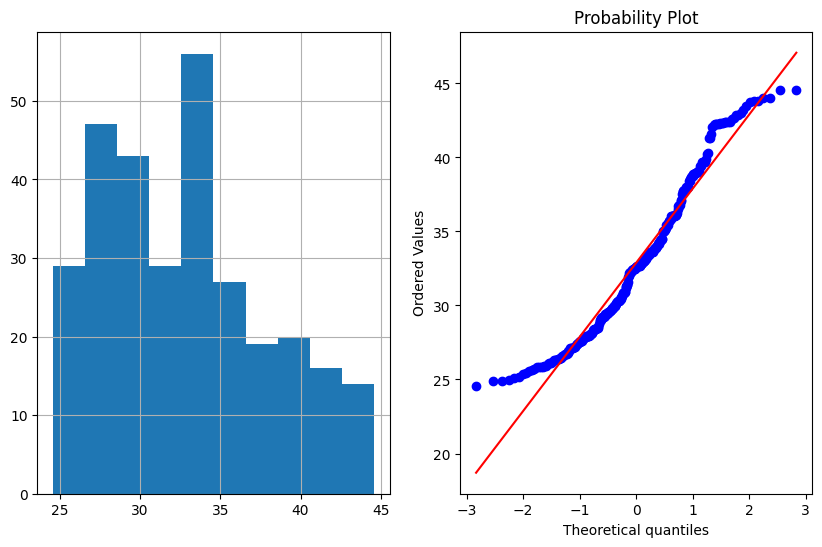

In [32]:
print(df['Avg_Heat_Index'].isna().sum())
plot_data(df,'Avg_Heat_Index')

In [33]:
df1 = df[['Avg_Heat_Index','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision   Recall  F_1 Score    
0         Logistic Regression        0.516667   0.605263  0.72973        0.72  \
1     DecisionTree Classifier        0.650000   0.735294  0.72973        0.72   
2     RandomForest Classifier        0.650000   0.722222  0.72973        0.72   
3               XGBClassifier        0.600000   0.666667  0.72973        0.72   
4  GradientBoostingClassifier        0.650000   0.710526  0.72973        0.72   

    ROC_AUC  
0  0.484724  
1  0.642186  
2  0.633960  
3  0.568743  
4  0.625734  
None
Score on training 0.7583333333333333
[0.52017504 0.47982496]
0
        Prob                    class
0   0.520175  Need Further Evaluation
1   0.635853  Need Further Evaluation
2   0.745765  Need Further Evaluation
3   0.667464  Need Further Evaluation
4   0.212563                      Low
5   0.337620                      Low
6   0.234014               

### Avg_humidity vs target

0


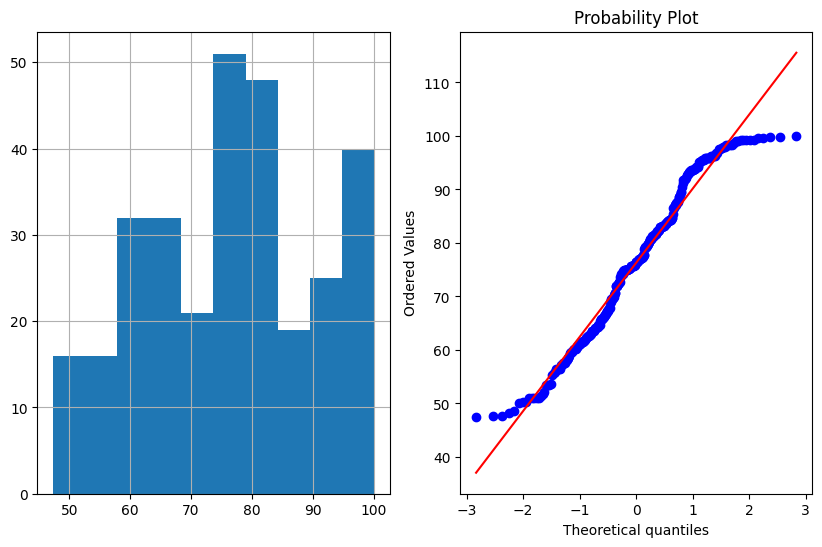

In [34]:
print(df['Avg_humidity'].isna().sum())
plot_data(df,'Avg_humidity')

In [35]:
df1 = df[['Avg_humidity','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.616667   0.616667  0.756757  \
1     DecisionTree Classifier        0.683333   0.750000  0.756757   
2     RandomForest Classifier        0.733333   0.769231  0.756757   
3               XGBClassifier        0.750000   0.761905  0.756757   
4  GradientBoostingClassifier        0.700000   0.756757  0.756757   

   F_1 Score    ROC_AUC  
0    0.756757  0.500000  
1    0.756757  0.669213  
2    0.756757  0.709753  
3    0.756757  0.715041  
4    0.756757  0.682726  
None
Score on training 0.7291666666666666
[0.7212052  0.27879483]
0
        Prob                    class
0   0.721205  Need Further Evaluation
1   0.311735                      Low
2   0.286400                      Low
3   0.471429                      Low
4   0.096161                      Low
5   0.566652  Need Further Evaluation
6   0.452888         

### Avg_TEMP vs target

0


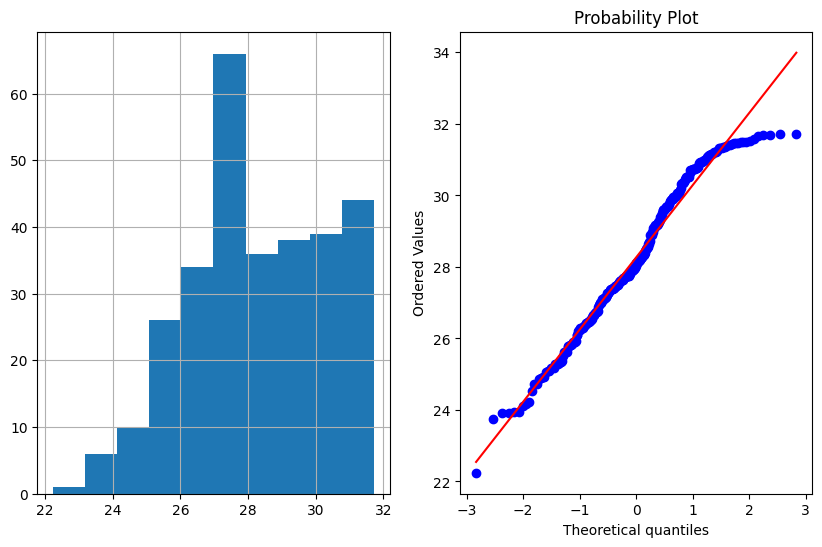

In [36]:
print(df['Avg_TEMP'].isna().sum())
plot_data(df,'Avg_TEMP')

In [37]:
df1 = df[['Avg_TEMP','target']]

X_train, X_test, y_train, y_test = dataset_divide(df1)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 1)
X_test : (60, 1)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.583333   0.636364  0.648649  \
1     DecisionTree Classifier        0.566667   0.657143  0.648649   
2     RandomForest Classifier        0.566667   0.648649  0.648649   
3               XGBClassifier        0.566667   0.648649  0.648649   
4  GradientBoostingClassifier        0.550000   0.631579  0.648649   

   F_1 Score    ROC_AUC  
0        0.64  0.530552  
1        0.64  0.549941  
2        0.64  0.541716  
3        0.64  0.541716  
4        0.64  0.519976  
None
Score on training 0.7458333333333333
[0.65750986 0.34249014]
0
        Prob                    class
0   0.657510  Need Further Evaluation
1   0.364719                      Low
2   0.657510  Need Further Evaluation
3   0.667659  Need Further Evaluation
4   0.212401                      Low
5   0.657510  Need Further Evaluation
6   0.308003         

## Now considering multiple features 

#### Feeder_Category, UpcaseRoadTraffic,Upcase_SoilCondition, 
#### Upcase_ArmourCableCondition,CABLE_SIZE,LENGTH_OF_CABLE_MTRS_,AGE_YRS_ vs target

In [38]:
df2 = df[['Feeder_Category','UpcaseRoadTraffic','Upcase_SoilCondition','Upcase_ArmourCableCondition',
           'CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_',
           'target']]

X_train, X_test, y_train, y_test = dataset_divide(df2)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 7)
X_test : (60, 7)
y_train : (240,)
y_test : (60,)


C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.566667   0.666667  0.567568  \
1     DecisionTree Classifier        0.500000   0.629630  0.567568   
2     RandomForest Classifier        0.583333   0.700000  0.567568   
3               XGBClassifier        0.516667   0.633333  0.567568   
4  GradientBoostingClassifier        0.550000   0.656250  0.567568   

   F_1 Score    ROC_AUC  
0    0.608696  0.558167  
1    0.608696  0.512338  
2    0.608696  0.588132  
3    0.608696  0.517626  
4    0.608696  0.544653  
None
Score on training 0.7458333333333333
[0.5421456  0.45785442]
0
        Prob                    class
0   0.542146  Need Further Evaluation
1   0.582460  Need Further Evaluation
2   0.431480                      Low
3   0.542146  Need Further Evaluation
4   0.204252                      Low
5   0.860593                     High
6   0.086546                      Low
7   0.487567                      Low
8   0.109756 

### Feeder_Category  CABLE_SIZE  LENGTH_OF_CABLE_MTRS_ AGE_YRS_ vs target

In [39]:
df2 = df[['Feeder_Category','CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_',
           'target']]

X_train, X_test, y_train, y_test = dataset_divide(df2)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 4)
X_test : (60, 4)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.583333   0.650000  0.513514  \
1     DecisionTree Classifier        0.450000   0.576923  0.513514   
2     RandomForest Classifier        0.533333   0.666667  0.513514   
3               XGBClassifier        0.550000   0.656250  0.513514   
4  GradientBoostingClassifier        0.516667   0.633333  0.513514   

   F_1 Score    ROC_AUC  
0    0.567164  0.547004  
1    0.567164  0.463572  
2    0.567164  0.547591  
3    0.567164  0.544653  
4    0.567164  0.517626  
None
Score on training 0.725
[0.54480517 0.45519483]
0
        Prob                    class
0   0.544805  Need Further Evaluation
1   0.516504  Need Further Evaluation
2   0.488268                      Low
3   0.544805  Need Further Evaluation
4   0.179364                      Low
5   0.872793                     High
6   0.126716                      

### Feeder_Category,'Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP', vs target

In [40]:
df2 = df[['Feeder_Category','Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP',
           'target']]

X_train, X_test, y_train, y_test = dataset_divide(df2)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 6)
X_test : (60, 6)
y_train : (240,)
y_test : (60,)
                         Name  Accuracy_Score  Precision    Recall   
0         Logistic Regression        0.616667   0.684211  0.837838  \
1     DecisionTree Classifier        0.633333   0.727273  0.837838   
2     RandomForest Classifier        0.750000   0.775000  0.837838   
3               XGBClassifier        0.650000   0.710526  0.837838   
4  GradientBoostingClassifier        0.750000   0.775000  0.837838   

   F_1 Score    ROC_AUC  
0    0.805195  0.590482  
1    0.805195  0.628672  
2    0.805195  0.723267  
3    0.805195  0.625734  
4    0.805195  0.723267  
None
Score on training 0.8666666666666667
[0.6477511  0.35224888]
0
        Prob                    class
0   0.647751  Need Further Evaluation
1   0.615426  Need Further Evaluation
2   0.146482                      Low
3   0.486030                      Low
4   0.059661                      Low
5   0.931459                     High
6   0.249127         

### Considering all columns  

In [41]:
df2 = df[['Feeder_Category','UpcaseRoadTraffic','Upcase_SoilCondition','Upcase_ArmourCableCondition',
           'CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_',
           'Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP',
           'target']]

X_train, X_test, y_train, y_test = dataset_divide(df2)
print(get_training(X_train, X_test, y_train, y_test))
get_prediction(X_train, X_test, y_train, y_test)

X_train : (240, 12)
X_test : (60, 12)
y_train : (240,)
y_test : (60,)


C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


                         Name  Accuracy_Score  Precision   Recall  F_1 Score    
0         Logistic Regression        0.616667   0.694444  0.72973    0.739726  \
1     DecisionTree Classifier        0.550000   0.656250  0.72973    0.739726   
2     RandomForest Classifier        0.733333   0.818182  0.72973    0.739726   
3               XGBClassifier        0.683333   0.800000  0.72973    0.739726   
4  GradientBoostingClassifier        0.683333   0.750000  0.72973    0.739726   

    ROC_AUC  
0  0.598707  
1  0.544653  
2  0.734430  
3  0.693890  
4  0.669213  
None
Score on training 0.9208333333333333
[0.6858849 0.3141151]
0
        Prob                    class
0   0.685885  Need Further Evaluation
1   0.765239                     High
2   0.355973                      Low
3   0.679228  Need Further Evaluation
4   0.095646                      Low
5   0.966065                     High
6   0.155196                      Low
7   0.500472  Need Further Evaluation
8   0.672493  Need Fu

### Hyparameter tuning 

In [42]:
from sklearn.model_selection import train_test_split

df_a = df[['Feeder_Category','UpcaseRoadTraffic','Upcase_SoilCondition','Upcase_ArmourCableCondition',
           'CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_',
           'Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP',
           'target']]

X_p = df_a.drop(columns=['target'])
y_p = df_a['target']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_p, y_p, test_size=0.2, random_state=1)

In [44]:
from sklearn.model_selection import GridSearchCV

n_estimators = [int(x) for x in np.linspace(start = 200, stop = 600, num = 5)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 60, num = 6)]
max_depth.append(None)
min_samples_split = [2, 5]
min_samples_leaf = [1, 2, 3]
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [45]:
#rf = RandomForestClassifier()

#cross_val = GridSearchCV(estimator = rf, param_grid = random_grid, cv = 3, verbose=2)
#cross_val.fit(X_train, y_train)

In [47]:
model = RandomForestClassifier(bootstrap=True, 
                               max_depth=50, 
                               max_features='sqrt', 
                               min_samples_leaf=1, 
                               min_samples_split=2, 
                               n_estimators=300)
model.fit(X_train,y_train)

RandomForestClassifier(max_depth=50, n_estimators=300)

In [48]:
#Fea = pd.DataFrame({'Feature': get_config('X_train').columns, 'Value' : abs(model.feature_importances_[0])}).sort_values(by='Value', ascending=False)
Fea = pd.DataFrame({'Feature': X_train.columns, 'Value' : abs(model.feature_importances_)}).sort_values(by='Value', ascending=False)
Fea

,Feature,Value
7,Average_Current,0.222108
9,Avg_Heat_Index,0.123876
11,Avg_TEMP,0.123395
5,LENGTH_OF_CABLE_MTRS_,0.121717
8,Average_voltage,0.105091
10,Avg_humidity,0.100091
6,AGE_YRS_,0.097790
4,CABLE_SIZE,0.031850
2,Upcase_SoilCondition,0.027197
3,Upcase_ArmourCableCondition,0.025621


In [49]:
l = LogisticRegression()
l.fit(X_train,y_train)

C:\Users\YR272YB\.virtualenvs\Global_Utility_05-sbsjTaLH\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [50]:
m = l.coef_
m = m.tolist()
m[0]

[0.0,
 -0.04473884532309317,
 0.08027975163508456,
 0.0913314239845815,
 0.0038520514642383127,
 0.0005377914784351491,
 0.03747690014838353,
 -0.05271745048610413,
 -0.21641676128749185,
 0.16376517511609787,
 -0.010963049763819236,
 -0.14005651150365303]

In [52]:
feature_names = l.feature_names_in_
feature_names

pd.DataFrame({
    "feature_names":feature_names,
    "va":m[0]
})

,feature_names,va
0,Feeder_Category,0.000000
1,UpcaseRoadTraffic,-0.044739
2,Upcase_SoilCondition,0.080280
3,Upcase_ArmourCableCondition,0.091331
4,CABLE_SIZE,0.003852
5,LENGTH_OF_CABLE_MTRS_,0.000538
6,AGE_YRS_,0.037477
7,Average_Current,-0.052717
8,Average_voltage,-0.216417
9,Avg_Heat_Index,0.163765


In [55]:
y_pred = model.predict(X_test)
y_pred

## Prediction on test set
class_pred = model.predict(X_test)
class_prob_test = model.predict_proba(X_test)
print(class_prob_test[0])
print(class_pred[0])

ab = []
for i in class_prob_test[:,0]:
    if i <= 0.5:
        ab.append("Low")
    elif i>0.5 and i<=0.75:
        ab.append("Need Further Evaluation")
    else:
        ab.append("High") 

[0.64333333 0.35666667]
0.0


In [56]:
pd.DataFrame(list(zip(class_prob_test[:,0],ab)))

,0,1
0,0.643333,Need Further Evaluation
1,0.560000,Need Further Evaluation
2,0.390000,Low
3,0.626667,Need Further Evaluation
4,0.120000,Low
5,0.806667,High
6,0.146667,Low
7,0.546667,Need Further Evaluation
8,0.620000,Need Further Evaluation
9,0.450000,Low


### Class Prediction for whole dataset

In [57]:
df_p = df[['Feeder_Category','UpcaseRoadTraffic','Upcase_SoilCondition','Upcase_ArmourCableCondition',
           'CABLE_SIZE','LENGTH_OF_CABLE_MTRS_','AGE_YRS_',
           'Average_Current','Average_voltage','Avg_Heat_Index','Avg_humidity','Avg_TEMP',
           'target']]

X_p = df_p.drop(columns=['target'])
y_p = df_p['target']

In [58]:
class_pred = model.predict(X_p)
class_prob_test = model.predict_proba(X_p)
print(class_prob_test[0])
print(class_pred[0])

ab = []
for i in class_prob_test[:,0]:
    if i <= 0.5:
        ab.append("Low")
    elif i>0.5 and i<=0.75:
        ab.append("Need Further Evaluation")
    else:
        ab.append("High")   

a = pd.DataFrame(list(zip(class_prob_test[:,0],ab,y_p)),columns =['Probability', 'Predicted_class','Actual_class'])
d = pd.concat([X_p,a],axis=1)
d

[0.40666667 0.59333333]
1.0


,Feeder_Category,UpcaseRoadTraffic,Upcase_SoilCondition,Upcase_ArmourCableCondition,CABLE_SIZE,LENGTH_OF_CABLE_MTRS_,AGE_YRS_,Average_Current,Average_voltage,Avg_Heat_Index,Avg_humidity,Avg_TEMP,Probability,Predicted_class,Actual_class
0,0.0,1,0,0,120.0,586.6,36.000000,2.086364,11.047187,26.667515,60.078646,25.887917,0.406667,Low,1.0
1,0.0,0,1,0,300.0,533.1,22.750988,2.101636,11.021667,24.975674,69.590937,23.927083,0.216667,Low,1.0
2,0.0,1,0,0,300.0,600.0,22.750988,3.785664,11.066146,25.394108,62.813750,23.755521,0.166667,Low,1.0
3,0.0,2,2,1,240.0,682.5,23.000000,5.247410,11.221042,25.914466,50.201458,24.734896,0.183333,Low,1.0
4,0.0,1,0,0,240.0,381.0,20.000000,0.919579,11.077917,26.553766,64.328646,25.372917,0.653333,Need Further Evaluation,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.0,0,1,1,240.0,1276.3,22.000000,7.948467,11.044375,34.500309,74.840833,29.382917,0.046667,Low,1.0
296,0.0,0,1,1,240.0,1276.3,22.000000,7.765019,11.067500,34.330905,62.240208,30.371562,0.086667,Low,1.0
297,0.0,1,0,0,240.0,387.1,18.000000,9.698051,11.092187,26.413268,62.986250,25.350833,0.820000,High,0.0
298,0.0,1,0,1,240.0,1078.1,24.000000,8.445092,11.070833,36.264426,81.260104,29.496875,0.106667,Low,1.0
